In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from src.utils.datasets.ggimages import OpenImage
from src.utils.datasets.transform import RandomHorizontalFlip, Resize, Compose, XyToCenter
import torchvision.transforms as transforms
from src.utils.display.images import imshow, result_show
from torch.utils.data import DataLoader
from src.utils.datasets.adapter import convert_data
import numpy as np
from src.network.yolo import Yolo
from src.config import VOC_ANCHORS
from src.utils.process_boxes import preprocess_true_boxes
from src.config import IOU_THRESHOLD, TENSORBOARD_PATH
from tensorboardX import SummaryWriter
from datetime import datetime
import time

In [3]:
classes = ['__background__', 'Tree', 'Flower']

In [4]:
from src.network.base import DarkNet, DarknetBody, YoloBody

model = Yolo(VOC_ANCHORS, classes)
model.load_state_dict(torch.load('./save_model/model_without_val_0.pth'))
model.eval()
model.cuda()

Yolo(
  (yolo_body): DataParallel(
    (module): YoloBody(
      (body_bottom): DarknetBodyBottom(
        (first_layer): Conv2d(
          (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
          (relu): LeakyReLU(negative_slope=0.1)
        )
        (second_layer): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (third_layer): Conv2d(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
          (relu): LeakyReLU(negative_slope=0.1)
        )
        (forth_layer): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (fifth_layer): BottleneckBlock(
          (first_layer): Conv2d(
            (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1),

In [33]:
batch_tensor = model.get_image_blob('./data/OpenImage_Val/Flower/0524486b5ca81fec.jpg')
boxes, scores, classes = model.predict('./data/OpenImage_Val/Flower/0524486b5ca81fec.jpg', score_threshold=0.5, iou_threshold=0.2)
print(classes, scores)

tensor([[[[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
           [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
           [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
           [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
           [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
           [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
           [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
           [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
           [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
           [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
           [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
           [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
           [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
           [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]]],


         [[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
           [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
           [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
           [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      

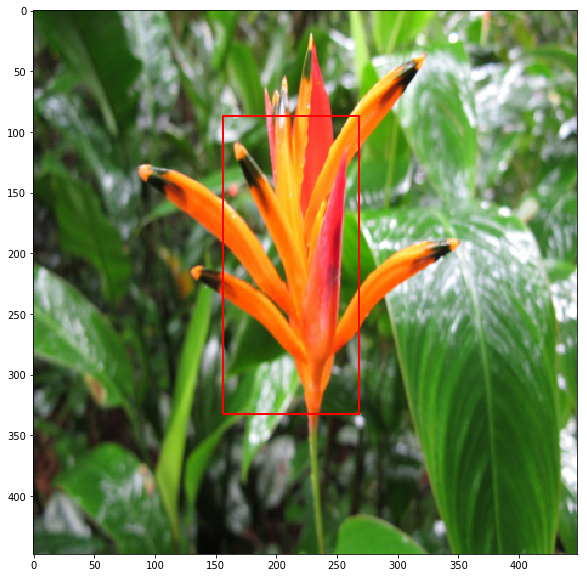

tensor([2], device='cuda:0') tensor([0.5430], device='cuda:0', grad_fn=<IndexBackward>) [[156.02957  86.89128 268.16156 332.6169 ]]


In [34]:
for k in range(batch_tensor.shape[0]):
    tmp = boxes.cpu()
    tmp = tmp.detach().numpy()       
    imshow(batch_tensor[k].cpu(), gt_boxes=tmp)
    print(classes, scores, tmp)
    break